In [41]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Vragen

1. Noem een voorbeeld uit de praktijk waarin jullie algoritme wordt gebruikt.
Het Random forest model wordt gebruikt in de Finaciele sector voor fraudedetecite. Het kan patronen identificeren die wijzen op verdachte activiteiten, zoals ongebruikelijke transacties of creditcardfraude. 

2. Hoe werkt het algoritme conceptueel? Wat zijn de belangrijkste stappen?
- Bootstrapping:
Maakt willekeurige subsets van de trainingsgegevens door exemplaren met vervanging te selecteren.
- Kenmerkselectie:
Selecteerd willekeurige kenmerken bij elke knoop in elke boom om overfitting te verminderen.
- Opbouwen van Beslissingsbomen:
Trained beslissingsbomen op de subsets van gegevens en kenmerken.
- Voorspellingen van Elke Boom:
Gebruikt elke boom om voorspellingen te doen op nieuwe gegevens.
- Aggregatie van Voorspellingen:
Combineert de voorspellingen van alle bomen om de uiteindelijke voorspelling van het Random Forest te verkrijgen, bijvoorbeeld door het nemen van gemiddelden (voor regressie) of meerderheid (voor classificatie).

3. Wat zijn de voor- en nadelen van jullie algoritme? In welke situaties werkt het heel
goed en wanneer juist niet?

Voordelen:
- Random Forest heeft vaak een hoge voorspellende nauwkeurigheid, zelfs zonder veel afstemming van hyperparameters.
- Door het gebruik van meerdere bomen en bootstrapping is Random Forest robuust tegen overfitting, overfitting gebeurt snel bij kleine datasets, wat bij ons het geval is.

Nadelen:
- Het maken van voorspellingen kan relatief lang duren, vooral bij grote aantallen bomen en kenmerken.

Wanneer werkt Random forest wel goed:
- Random Forest presteert goed bij complexe taken waarin er veel interacties en niet-lineaire relaties tussen kenmerken zijn.

Wanneer werkt Random forest niet goed:
- Als snelle voorspellingen cruciaal zijn, kan Random Forest minder geschikt zijn vanwege de aggregatie van resultaten over meerdere bomen.


In [76]:
data = pd.read_csv('./data/classification/data.csv')

## Verkenende analyse

In [77]:
# Hier word gekeken hoe het dataframe eruit ziet
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [78]:
# Hier wordt gekeken welke kolommen er allemaal in de dataframe staan
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [79]:
# Wat is het type van de data in het dataframe?
# Als het dataframe een kolom heeft met veel Nan waarden of missing values dan kan deze kolom gedropt worden of dan moeten deze waarden ingevuld worden.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [80]:
# Zitten er nan values in het dataframe?
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [81]:
# Unnamed 32 is een kolom met alleen maar nan waardes, deze is dus niet nodig
data.drop(columns = ['Unnamed: 32', 'id'], inplace= True)


In [82]:
# M = malignant (kwaadaardig) B = begnin (goedaardig)
# Wat is ongeveer de verhoding van goedaardig en kwaadaardig
print(data.diagnosis.value_counts())
data.diagnosis.value_counts(normalize = True)

diagnosis
B    357
M    212
Name: count, dtype: int64


diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

In [83]:
# voor machine learning moet alles een numerieke waarde zijn, dus kwaadaardig = 1 goedaardig  = 0
data['diagnosis'] = data['diagnosis'].replace({'M': 1, 'B': 0})

In [84]:
# De correlatie maken tussen de verschillende kolommen
corr = data.corr()

In [85]:
# Hier kan gezien worden welke kolommen de hoogste correlatie hebben met de diagnose 
# Het spreekt voor zich dat de kolom diagnosis precies een correlatie heeft van 1, 
# concave points_worst heeft dus de hoogste correlatie
corr['diagnosis'].sort_values(ascending = False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [86]:
# Het maken van een heatmap zodat er overzichtelijk gezien kan worden welke variablen een correlatie met elkaar hebben
px.imshow(corr)

<Axes: xlabel='concave points_worst', ylabel='diagnosis'>

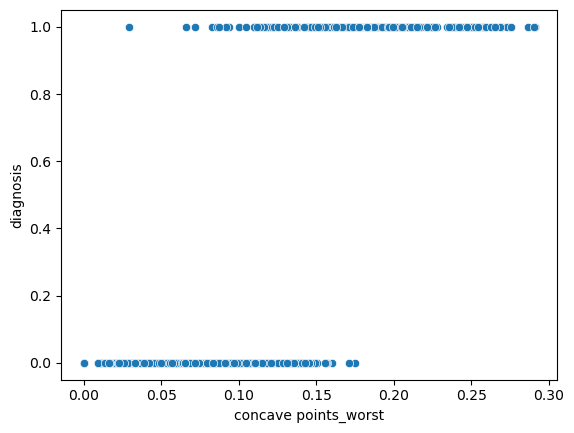

In [87]:
# spreiding van de meest gecoreleerde variable met diagnosis,
# Hier kan al een beetje gezien worden dat als de concave points_worst >0.20 is dat het altijd kwaadaardig is
sns.scatterplot(data, x = 'concave points_worst', y = 'diagnosis')

# Het classificatie model

Voor het classifiseren van borstkanker is de accuratiteit belangrijker dan de snelheid van het model.
Daarnaast is het geen grote dataset dus in overfitting een gevaar. Hierdoor gebruiken wij het randomforest calssifatie model.

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Creëer een dataframe met de kenmerken en de doelvariabele
# data is je originele dataframe

# Selecteer de doelvariabele
y = data["diagnosis"]

# Initialiseer de lijst die de nauwkeurigheid van elk model zal bevatten
accuracy_list = []

# Begin met de hoogst gecorreleerde kolom
# Vervang "diagnosis" door de daadwerkelijke naam van je doelvariabele
selected_columns = data.corr()["diagnosis"].sort_values(ascending=False).index[1:2].tolist()

# Print de geselecteerde kolommen om te controleren of ze overeenkomen met je verwachtingen
print("Selected Columns:", selected_columns)

# Houd de beste combinatie van kolommen en nauwkeurigheid bij
best_columns = selected_columns
best_accuracy = 0.0

# Maak een lus die doorgaat totdat de nauwkeurigheid niet meer hoger wordt
while True:
    # Voeg de volgende best presterende kolom toe aan de geselecteerde kolommen
    best_performing_column = None
    best_performing_accuracy = 0.0

    # Itereer over de kolommen die niet in de geselecteerde kolommen zitten
    for column in data.columns.difference(["diagnosis"] + selected_columns):
        current_columns = selected_columns + [column]
        X = data[current_columns]

        # Split de data in trainings- en testsets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Maak en train het Random Forest-model
        rf_model = RandomForestClassifier(random_state=42)
        rf_model.fit(X_train, y_train)

        # Doe voorspellingen op de testset
        predictions = rf_model.predict(X_test)

        # Bereken de nauwkeurigheid
        current_accuracy = accuracy_score(y_test, predictions)

        # Controleer of de huidige kolom beter presteert dan de beste tot nu toe
        if current_accuracy > best_performing_accuracy:
            best_performing_accuracy = current_accuracy
            best_performing_column = column

    # Controleer of toevoeging van een nieuwe kolom de nauwkeurigheid heeft verbeterd
    if best_performing_column is not None:
        selected_columns.append(best_performing_column)
        accuracy_list.append(best_performing_accuracy)
        print(f"Model met {len(selected_columns)} kolommen: {selected_columns}, Nauwkeurigheid: {best_performing_accuracy}")

        # Update de beste combinatie van kolommen als de huidige nauwkeurigheid beter is
        if best_performing_accuracy > best_accuracy:
            best_accuracy = best_performing_accuracy
            best_columns = selected_columns
    else:
        # Stop de lus als geen verbetering wordt gevonden
        break

# Toon de uiteindelijke resultaten
print(f"\nUiteindelijk geselecteerde kolommen: {best_columns}, Nauwkeurigheid: {best_accuracy}")


Selected Columns: ['concave points_worst']
Model met 2 kolommen: ['concave points_worst', 'area_se'], Nauwkeurigheid: 0.9649122807017544
Model met 3 kolommen: ['concave points_worst', 'area_se', 'texture_worst'], Nauwkeurigheid: 0.9824561403508771
Model met 4 kolommen: ['concave points_worst', 'area_se', 'texture_worst', 'compactness_mean'], Nauwkeurigheid: 0.9736842105263158
Model met 5 kolommen: ['concave points_worst', 'area_se', 'texture_worst', 'compactness_mean', 'symmetry_se'], Nauwkeurigheid: 0.9824561403508771
Model met 6 kolommen: ['concave points_worst', 'area_se', 'texture_worst', 'compactness_mean', 'symmetry_se', 'radius_se'], Nauwkeurigheid: 0.9736842105263158
Model met 7 kolommen: ['concave points_worst', 'area_se', 'texture_worst', 'compactness_mean', 'symmetry_se', 'radius_se', 'fractal_dimension_worst'], Nauwkeurigheid: 0.9736842105263158
Model met 8 kolommen: ['concave points_worst', 'area_se', 'texture_worst', 'compactness_mean', 'symmetry_se', 'radius_se', 'fracta

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Creëer een dataframe met de kenmerken en de doelvariabele
# data is je originele dataframe

# Selecteer de doelvariabele
y = data["diagnosis"]

# Initialiseer de lijst die de nauwkeurigheid van elk model zal bevatten
accuracy_list = []

# Begin met de hoogst gecorreleerde kolom
# Vervang "diagnosis" door de daadwerkelijke naam van je doelvariabele
selected_columns = data.corr()["diagnosis"].sort_values(ascending=False).index[1:2].tolist()

# Print de geselecteerde kolommen om te controleren of ze overeenkomen met je verwachtingen
print("Selected Columns:", selected_columns)

# Houd de beste combinatie van kolommen en nauwkeurigheid bij
best_columns = selected_columns
best_accuracy = 0.0

# Stel de tolerantie in voor het stoppen van de lus
tolerance = 0.001  # Je kunt dit aanpassen aan je behoeften

# Maak een lus die doorgaat totdat de nauwkeurigheid niet meer hoger wordt
while True:
    # Voeg de volgende best presterende kolom toe aan de geselecteerde kolommen
    best_performing_column = None
    best_performing_accuracy = 0.0

    # Itereer over de kolommen die niet in de geselecteerde kolommen zitten
    for column in data.columns.difference(["diagnosis"] + selected_columns):
        current_columns = selected_columns + [column]
        X = data[current_columns]

        # Split de data in trainings- en testsets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Maak en train het Random Forest-model
        rf_model = RandomForestClassifier(random_state=42)
        rf_model.fit(X_train, y_train)

        # Doe voorspellingen op de testset
        predictions = rf_model.predict(X_test)

        # Bereken de nauwkeurigheid
        current_accuracy = accuracy_score(y_test, predictions)

        # Controleer of de huidige kolom beter presteert dan de beste tot nu toe
        if current_accuracy > best_performing_accuracy:
            best_performing_accuracy = current_accuracy
            best_performing_column = column

    # Controleer of toevoeging van een nieuwe kolom de nauwkeurigheid heeft verbeterd
    if best_performing_column is not None:
        selected_columns.append(best_performing_column)
        accuracy_list.append(best_performing_accuracy)
        print(f"Model met {len(selected_columns)} kolommen: {selected_columns}, Nauwkeurigheid: {best_performing_accuracy}")

        # Update de beste combinatie van kolommen als de huidige nauwkeurigheid beter is
        if best_performing_accuracy > best_accuracy:
            best_accuracy = best_performing_accuracy
            best_columns = selected_columns
        else:
            # Stop de lus als de verbetering in nauwkeurigheid onder de tolerantie ligt
            if best_accuracy - best_performing_accuracy < tolerance:
                break
    else:
        # Stop de lus als geen verbetering wordt gevonden
        break

# Toon de uiteindelijke resultaten
print(f"\nUiteindelijk geselecteerde kolommen: {best_columns}, Nauwkeurigheid: {best_accuracy}")


Selected Columns: ['concave points_worst']
Model met 2 kolommen: ['concave points_worst', 'area_se'], Nauwkeurigheid: 0.9649122807017544
Model met 3 kolommen: ['concave points_worst', 'area_se', 'texture_worst'], Nauwkeurigheid: 0.9824561403508771
Model met 4 kolommen: ['concave points_worst', 'area_se', 'texture_worst', 'compactness_mean'], Nauwkeurigheid: 0.9736842105263158
Model met 5 kolommen: ['concave points_worst', 'area_se', 'texture_worst', 'compactness_mean', 'symmetry_se'], Nauwkeurigheid: 0.9824561403508771

Uiteindelijk geselecteerde kolommen: ['concave points_worst', 'area_se', 'texture_worst', 'compactness_mean', 'symmetry_se'], Nauwkeurigheid: 0.9824561403508771


In [122]:
data.corr()["diagnosis"].sort_values(ascending=False).head(10)

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: diagnosis, dtype: float64

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Annahme: Je hebt een DataFrame genaamd 'data'
# en de gewenste kolommen zijn: 'concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'diagnosis'

# Stap 1: Selecteer de gewenste kolommen
selected_columns = ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'diagnosis']
data_selected = data[selected_columns]

# Stap 2: Verdeel de gegevens in trainings- en testsets
X = data_selected.drop('diagnosis', axis=1)
y = data_selected['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stap 3: Initialiseer en train de Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Stap 4: Voorspel de diagnose op de testset
y_pred = clf.predict(X_test)

# Stap 5: Evalueer de prestaties van de classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Nauwkeurigheid: {accuracy}')

# Toon het classificatierapport
print('Classificatierapport:')
print(classification_report(y_test, y_pred))

# Toon de verwarringsmatrix
print('Verwarringsmatrix:')
print(confusion_matrix(y_test, y_pred))


Nauwkeurigheid: 0.956140350877193
Classificatierapport:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Verwarringsmatrix:
[[69  2]
 [ 3 40]]


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Hier wordt de y (wat moet er voorspeld worden) en de x (de features(met wat wordt de y voorspeld))- 
# - bepaald. De y = de diagnose en de x = concave points_worst (de variabble met de hoogste correlatie)
# Bij X wordt .reshape(-1, 1) gebruikt. Hiermee moet python zelf de vorm van de array bepalen.
#X = data.drop('diagnosis', axis=1)  
X1 = data['concave points_worst','perimeter_worst','concave points_mean','radius_worst','perimeter_mean']

y = data['diagnosis']


KeyError: ('concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean')

In [60]:
# De data set aan het verdelen tussen een train dataset en een test dataset,
# hier wordt 20% de test dataset zodat de dataset niet overgefit wordt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [61]:
from sklearn.ensemble import RandomForestClassifier

# Hier wordt een instantie van het random forest classifier model gemaakt.
# Hier zouden ook verschillen Hyperparameters ingesteld kunnen worden,
# echter zijn de standaard instellingen vaak een goed uitgangspunt.

rf_model = RandomForestClassifier(random_state=42)


In [63]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
# Hier wordt er met het getrainde model de waarden voorspeld op de test data
predictions = rf_model.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Hier wordt de nauwkeurigheid berekend
accuracy = accuracy_score(y_test, predictions)
print(f"Nauwkeurigheid: {accuracy}")

# Andere evaluatiemetingen
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


Nauwkeurigheid: 0.8771929824561403
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        67
           1       0.90      0.79      0.84        47

    accuracy                           0.88       114
   macro avg       0.88      0.86      0.87       114
weighted avg       0.88      0.88      0.88       114

[[63  4]
 [10 37]]


In [137]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Stap 1: Univariate Feature Selection
# Selecteer de top 'k' kenmerken op basis van chi-kwadraattest
selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X, y)

# Print de indices van de geselecteerde kenmerken
selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]
print("Geselecteerde kenmerken:", selected_features)

# Stap 2: Split de gegevens
# Verdeel je gegevens in training en testsets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Stap 3: Creëer en train het model
# Creëer je model
model = RandomForestClassifier()

# Train het model op de geselecteerde kenmerken
model.fit(X_train, y_train)

# Stap 4: Evalueer het model
# Voorspel de labels voor de testset
y_pred = model.predict(X_test)

# Evalueer de prestaties van het model
print("Accuratesse:", accuracy_score(y_test, y_pred))
print("Classificatie Rapport:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Geselecteerde kenmerken: Index(['perimeter_mean', 'area_mean', 'area_se', 'perimeter_worst',
       'area_worst'],
      dtype='object')
Accuratesse: 0.9824561403508771
Classificatie Rapport:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
 [[71  0]
 [ 2 41]]
